# <center>Speech Authorship Classification for the U.S. Presidents



 In this notebook, I got interested to get the author of a particular speech by a machine learning algorithm after watching a video on youtube that used R language to do a similar task.
 
 Video link: https://www.youtube.com/watch?v=j1V2McKbkLo

 However the video only did the task of predicting the author to be either Obama or Mit Romney only. I want to increase the possible options to include min. of 4 presidents. 

 In this notebook, I used the technique we took at Nile University, Data Mining course made by Dr Samhaa Elbeltagy, to do text classification using TDM, TFIDF  and using Naive Bayes classifier to classify the presidents

In [1]:
import nltk
import numpy as np
import pandas as pd 

The speeches for the 45 presidents are all in Miller Center's website: https://millercenter.org/the-presidency/presidential-speeches

I scrapped them using BeautfulSoup and urllib pyhton libraries and created a folder for each president that has all his speeches, with the date and title of speech as the filename. Then created a csv file containing 3 columns: president, title of the speech and the actual transcript of the speech. 
I removed the debates that were included in the website, I also removed some commonly used text that was added to the speeches to include the crowd like: (Applause), (Laughter)...etc, using sed command.

However, since I don't have the rights to include those files here so you'll have to do the scrapping yourself..sorry

### Load the data from the csv created from the scrapping step

In [2]:
all_speeches = pd.read_csv("allspeechesDF_trimmed.csv",usecols=['president','title','text'])

all_speeches.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 951 entries, 0 to 950
Data columns (total 3 columns):
president    951 non-null object
title        951 non-null object
text         951 non-null object
dtypes: object(3)
memory usage: 22.4+ KB


We have 951 speeches 

In [3]:
all_speeches[:5]

,president,title,text
0,George Washington,"April 30, 1789: First Inaugural Address",Fellow Citizens of the Senate and the House of...
1,George Washington,"October 3, 1789: Thanksgiving Proclamation",Whereas it is the duty of all Nations to ackno...
2,George Washington,"January 8, 1790: First Annual Message to Congress",Fellow Citizens of the Senate and House of Rep...
3,George Washington,"December 8, 1790: Second Annual Message to Con...",Fellow citizens of the Senate and House of Rep...
4,George Washington,"December 29, 1790: Talk to the Chiefs and Coun...","I the President of the United States, by my ow..."


Here I will start by 4 presidents, Obama, George Washington, Lincoln and Ronald Reagan, for no particular reason at all... :)

In [4]:
fourpresidents=all_speeches[all_speeches['president'].str.contains('Obama') | all_speeches['president'].str.contains('Washing')|all_speeches['president'].str.contains('Reagan')|all_speeches['president'].str.contains('Lincoln')]

In [5]:
fourpresidents

,president,title,text
0,George Washington,"April 30, 1789: First Inaugural Address",Fellow Citizens of the Senate and the House of...
1,George Washington,"October 3, 1789: Thanksgiving Proclamation",Whereas it is the duty of all Nations to ackno...
2,George Washington,"January 8, 1790: First Annual Message to Congress",Fellow Citizens of the Senate and House of Rep...
3,George Washington,"December 8, 1790: Second Annual Message to Con...",Fellow citizens of the Senate and House of Rep...
4,George Washington,"December 29, 1790: Talk to the Chiefs and Coun...","I the President of the United States, by my ow..."
5,George Washington,"October 25, 1791: Third Annual Message to Cong...","I meet you, upon the present occasion, with th..."
6,George Washington,"April 5, 1792: Veto Message on Congressional R...",Gentlemen of the House of Representatives: I h...
7,George Washington,"November 6, 1792: Fourth Annual Message to Con...","Fellow-Citizens of the Senate, and of the Hous..."
8,George Washington,"December 12, 1792: Proclamation Against Crimes...","Whereas I have received authentic information,..."
9,George Washington,"March 4, 1793: Second Inaugural Address",Fellow-Citizens:\n\nI am again called upon by ...


In [6]:
fourpresidents.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 138 entries, 0 to 947
Data columns (total 3 columns):
president    138 non-null object
title        138 non-null object
text         138 non-null object
dtypes: object(3)
memory usage: 4.3+ KB


Here we split training and test data for the four presidents while keeping the ratio of each president the same way it is present in the training data (i.e. stratified)

In [7]:
from sklearn.cross_validation import train_test_split

pres_train,pres_test,pres_train_labels,pres_test_labels = train_test_split(fourpresidents["text"],                   
                                                 fourpresidents['president'], test_size=0.25,
                                                 stratify=fourpresidents['president'],
                                                 random_state=1)

print (pres_test[:5])
print (pres_test_labels[:5])


925    Good afternoon, everybody.  As a candidate for...
754    The President. This morning at 7 a.m. the unio...
751    Father Hesburgh, I thank you very much and for...
779    Mr. Chairman, Mr. Vice President, delegates to...
937    Hello, Warrensburg!    Hello, Mules!    Hello,...
Name: text, dtype: object
925     Barack Obama
754    Ronald Reagan
751    Ronald Reagan
779    Ronald Reagan
937     Barack Obama
Name: president, dtype: object


/home/aa/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### Classification

In [8]:
#Load libraries needed for classification 
from sklearn import naive_bayes
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics

At first we will start by using the CountVectorizer that only counts the occurance of words in a given document to create a Term Document 

In [9]:
vectorizer = CountVectorizer().fit(pres_train)
print (len(vectorizer.get_feature_names()))
print (vectorizer.get_feature_names()[-300:])


14901
['westand', 'western', 'westminster', 'westward', 'what', 'whatever', 'whatsoever', 'wheat', 'wheel', 'wheelchairs', 'wheeler', 'wheels', 'when', 'whence', 'whenever', 'where', 'whereabouts', 'whereas', 'whereby', 'wherefore', 'wherein', 'whereof', 'whereupon', 'wherever', 'wherewith', 'whersoever', 'whether', 'which', 'whichever', 'while', 'whilst', 'whim', 'whims', 'whip', 'whisper', 'whistle', 'white', 'whites', 'whitman', 'whittaker', 'whittier', 'whittling', 'who', 'whoever', 'whole', 'wholehearted', 'wholesome', 'wholly', 'whom', 'whomsoever', 'whopping', 'whose', 'whosoever', 'why', 'wicked', 'wickedness', 'wide', 'widely', 'wider', 'widow', 'widows', 'wield', 'wielded', 'wier', 'wife', 'wild', 'wilderness', 'wildest', 'wildfires', 'wildly', 'wilful', 'will', 'william', 'williams', 'williamsburg', 'williamson', 'willing', 'willingly', 'willingness', 'wills', 'willshew', 'wilson', 'win', 'wind', 'winding', 'window', 'windows', 'winds', 'windswept', 'windy', 'wine', 'wing', 

In [10]:
pres_train_vectorized = vectorizer.transform( pres_train)
pres_train_vectorized

<103x14901 sparse matrix of type '<class 'numpy.int64'>'
	with 98200 stored elements in Compressed Sparse Row format>

In [11]:
pres_test_vectorized = vectorizer.transform( pres_test)
pres_test_vectorized

<35x14901 sparse matrix of type '<class 'numpy.int64'>'
	with 29292 stored elements in Compressed Sparse Row format>

In [12]:
clfr = naive_bayes.MultinomialNB()
clfr.fit(pres_train_vectorized,pres_train_labels)
predicted = clfr.predict(pres_test_vectorized)
acc = metrics.accuracy_score(pres_test_labels,predicted)
print ('accuracy = '+str(acc*100)+'%')
print (metrics.classification_report(pres_test_labels,predicted))

accuracy = 88.5714285714%
                   precision    recall  f1-score   support

  Abraham Lincoln       0.50      0.67      0.57         3
     Barack Obama       1.00      1.00      1.00        12
George Washington       1.00      0.40      0.57         5
    Ronald Reagan       0.88      1.00      0.94        15

      avg / total       0.91      0.89      0.88        35



Confusion matrix to see more clearly the mix between presidents

In [13]:
from sklearn.metrics import confusion_matrix
co=confusion_matrix(list(predicted),list(pres_test_labels))
co

array([[ 2,  0,  2,  0],
       [ 0, 12,  0,  0],
       [ 0,  0,  2,  0],
       [ 1,  0,  1, 15]])

We can see that one speech by Lincoln was classified as a speech by Reagan, while 2 speeches by Washington was classified as from Lincoln and 1 speech as by Reagan

### Experimenting with  some pre-processing 

In [14]:
def train():
    p_train_vectorized = vectorizer.transform( pres_train)
    p_test_vectorized = vectorizer.transform( pres_test)
    clfr.fit(p_train_vectorized,pres_train_labels)
    predicted = clfr.predict(p_test_vectorized)
    acc = metrics.accuracy_score(pres_test_labels,predicted)
    print ('accuracy = '+str(acc*100)+'%')
    print (metrics.classification_report(pres_test_labels,predicted))
    print(confusion_matrix(list(predicted),list(pres_test_labels)))

Reducing the number of features  by incereasing the minmum document frequency required


In [15]:
vectorizer = CountVectorizer(min_df=3 ).fit(pres_train)
print (len(vectorizer.get_feature_names()))
train()

6507
accuracy = 97.1428571429%
                   precision    recall  f1-score   support

  Abraham Lincoln       1.00      0.67      0.80         3
     Barack Obama       1.00      1.00      1.00        12
George Washington       1.00      1.00      1.00         5
    Ronald Reagan       0.94      1.00      0.97        15

      avg / total       0.97      0.97      0.97        35

[[ 2  0  0  0]
 [ 0 12  0  0]
 [ 0  0  5  0]
 [ 1  0  0 15]]


Just one misclassified speech...

#### Trying to stem and seeing the result

In [16]:
from nltk.stem.porter import PorterStemmer
def tokenize(text):
    tokens = nltk.word_tokenize(text)
    stems = []
    for item in tokens:
        stems.append(PorterStemmer().stem(item))
    return stems

In [17]:
vectorizer = CountVectorizer( tokenizer=tokenize, min_df=3  ).fit(pres_train)


In [18]:
train()

accuracy = 97.1428571429%
                   precision    recall  f1-score   support

  Abraham Lincoln       1.00      0.67      0.80         3
     Barack Obama       1.00      1.00      1.00        12
George Washington       1.00      1.00      1.00         5
    Ronald Reagan       0.94      1.00      0.97        15

      avg / total       0.97      0.97      0.97        35

[[ 2  0  0  0]
 [ 0 12  0  0]
 [ 0  0  5  0]
 [ 1  0  0 15]]


No improvement using stemming, just longer time to process

### Using TFIDF

In [19]:
vectorizer = TfidfVectorizer( min_df=28,  stop_words='english').fit(pres_train)
print (len(vectorizer.get_feature_names()))
train()

606
accuracy = 85.7142857143%
                   precision    recall  f1-score   support

  Abraham Lincoln       0.00      0.00      0.00         3
     Barack Obama       1.00      0.83      0.91        12
George Washington       0.71      1.00      0.83         5
    Ronald Reagan       0.83      1.00      0.91        15

      avg / total       0.80      0.86      0.82        35

[[ 0  0  0  0]
 [ 0 10  0  0]
 [ 2  0  5  0]
 [ 1  2  0 15]]


/home/aa/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Much worse

In [20]:
import wordcloud
from wordcloud import WordCloud, STOPWORDS
import matplotlib as mpl
import matplotlib.pyplot as plt

In [21]:
nameso=list(set(fourpresidents['president']))

Barack Obama


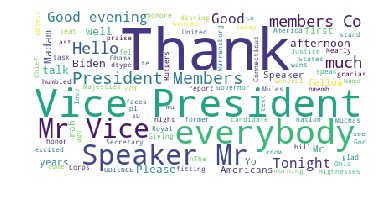

George Washington


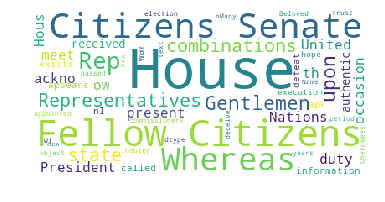

Abraham Lincoln


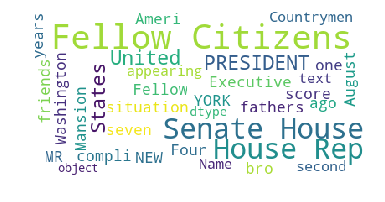

Ronald Reagan


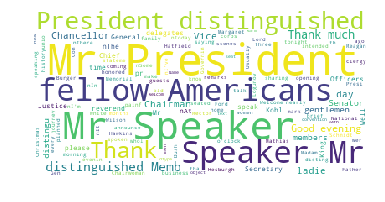

In [22]:
for n in nameso:
    print(n)
    p = fourpresidents['president']==n
    stopwords = set(STOPWORDS)
    wordcloud = WordCloud(background_color='white').generate(str(fourpresidents[p]['text']))

    print(wordcloud)
    fig = plt.figure(1)
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
    #fig.savefig("word1.png", dpi=1200)

We can see that each president have some prominent words like Fellow Citizens most prominent with Lincoln, while Mr Speaker and Mr President used more often with Reagan, and House used more often with Washington, and in the case of Obama the work "Thank", which is intersting to see him thanking the crowd that is cheering for him all the time...

#### One last Thing, let's try to increase the authors to see how the accuracy of the system will be if we included all presidents

In [23]:
pres_train,pres_test,pres_train_labels,pres_test_labels = train_test_split(all_speeches["text"],                   
                                                 all_speeches['president'], test_size=0.25,
                                                 stratify=all_speeches['president'],
                                                 random_state=1)

In [24]:
vectorizer = CountVectorizer(min_df=35 ).fit(pres_train)
print (len(vectorizer.get_feature_names()))
train()

4206
accuracy = 71.0084033613%
                       precision    recall  f1-score   support

      Abraham Lincoln       1.00      0.67      0.80         3
       Andrew Jackson       0.40      0.86      0.55         7
       Andrew Johnson       0.58      0.88      0.70         8
         Barack Obama       0.83      0.83      0.83        12
    Benjamin Harrison       1.00      0.60      0.75         5
         Bill Clinton       0.88      0.70      0.78        10
      Calvin Coolidge       1.00      1.00      1.00         3
    Chester A. Arthur       1.00      0.67      0.80         3
         Donald Trump       0.00      0.00      0.00         1
 Dwight D. Eisenhower       0.00      0.00      0.00         1
Franklin D. Roosevelt       0.75      1.00      0.86        12
      Franklin Pierce       0.33      0.25      0.29         4
    George H. W. Bush       1.00      0.40      0.57         5
       George W. Bush       0.71      1.00      0.83        10
    George Washington  

/home/aa/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy drops significantly from 97.14% to 71%


# Future Work:
Add more features, not just words...like the sentence length, emphasis and frequency of using certain POSs like adverbs, nouns...etc, also the average length of speech
